In [11]:
# Importing all the libraries necessary for Churn project

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib 
import matplotlib.pyplot as plt
from IPython.display import display,HTML
%matplotlib inline

In [3]:
# Reading the csv file data and understanding the information by using head information

churn_data = pd.read_csv('C:/Users/shubhangipatil/Desktop/Python/Churn.csv')
churn_data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
# Exploratory data analysis, understanding distribution of data, data type of each column

#Below function gives the no of rows, count of values for a row

print('No of rows:',churn_data.shape[0])
counts=churn_data.describe().iloc[0]
display(
    pd.DataFrame(
        counts.tolist(),
        columns = ["Count of values"],
        index =counts.index.values
    ).transpose()
)

#Dataset is clean and hence doesn't need extra cleaning

No of rows: 3333


,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
Count of values,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0


In [5]:
#Feature selection, dropping columns not useful for prediction

churn_data=churn_data.drop(["Phone","Area Code","State"],axis=1)
features=churn_data.drop(["Churn"],axis=1).columns

#Check the dataset for the columns
#churn_data.head()

In [6]:
#Splitting dataset into test and train sets using 75% and 25% split 

churn_data_train,churn_data_test=train_test_split(churn_data,test_size=0.25)

In [7]:
#Random Classifier predictions

clf=RandomForestClassifier(n_estimators=30)
clf.fit(churn_data_train[features], churn_data_train["Churn"])

# Make predictions
predictions = clf.predict(churn_data_test[features])
probs = clf.predict_proba(churn_data_test[features])

#Displaying whether customer has churned or not(0s and 1s)
display(predictions)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
# Evaluating whether Random Forest works well, evaluating the model

score = clf.score(churn_data_test[features], churn_data_test["Churn"])
print("Accuracy: ", score)

#90% accuracy which is good

Accuracy:  0.9496402877697842


,Predicted False,Predicted True
Actual False,703,5
Actual True,37,89


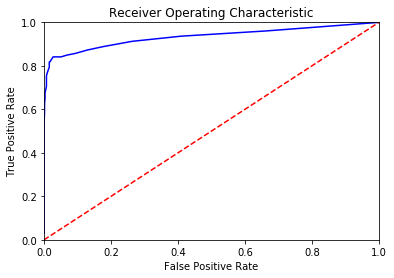

In [9]:
#ROC Curve and confusion matrix to understand more accuracy related results

confusion_matrix = pd.DataFrame(
    confusion_matrix(churn_data_test["Churn"], predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(churn_data_test["Churn"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

,importance,labels
10,0.142204,Day Charge
2,0.132632,Day Mins
6,0.122543,CustServ Calls
7,0.080424,Int'l Plan
3,0.073171,Eve Mins


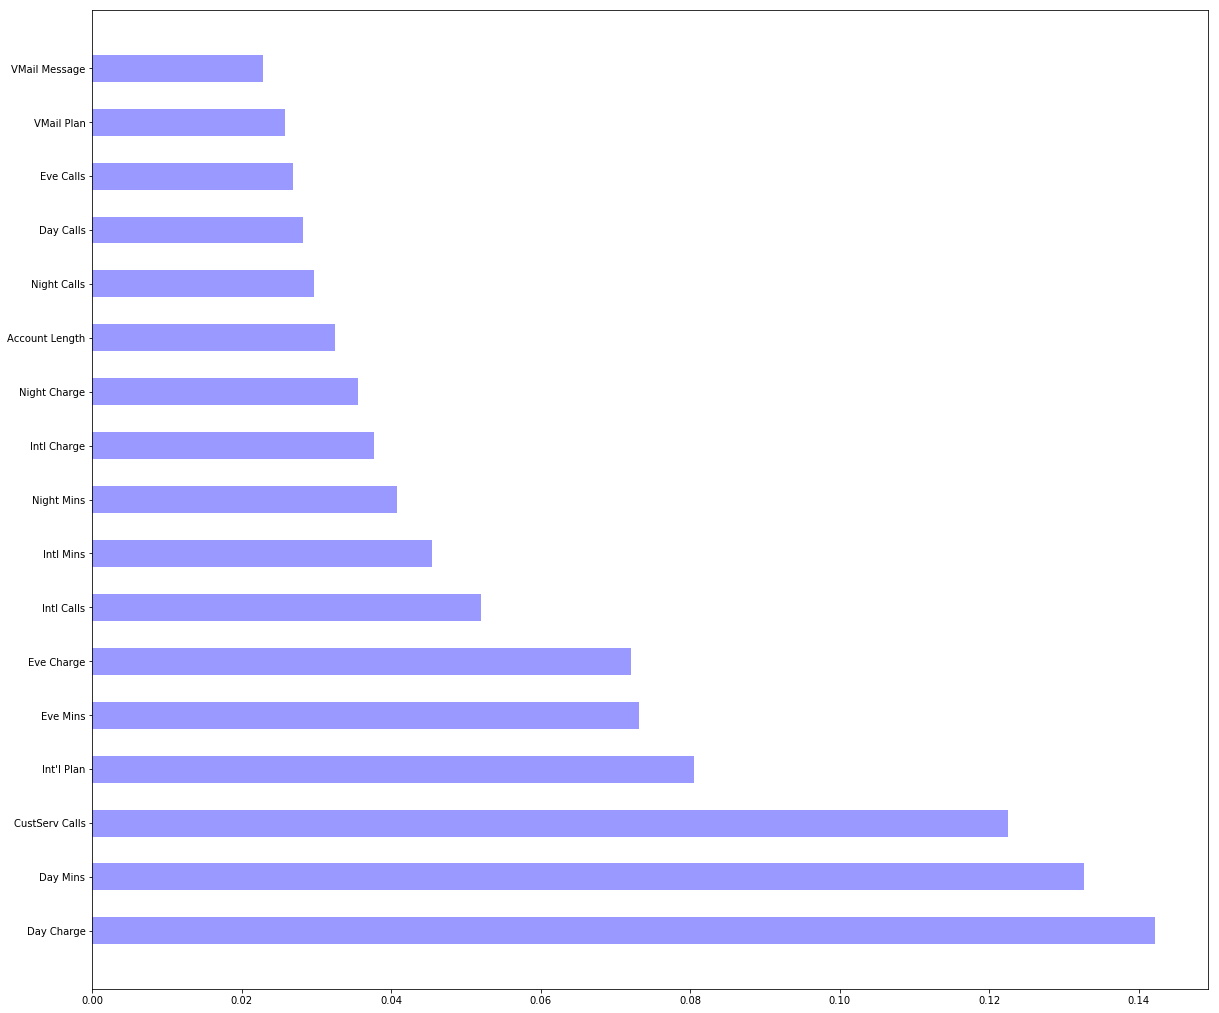

In [12]:
#Gaining information to know which characteristics are most important for prediction for future model evaluation

fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

In [14]:
#Check for churn value for all the clients that have better predictions

churn_data_test["prob_true"] = probs[:, 1]
df_risky = churn_data_test[churn_data_test["prob_true"] > 0.9]
display(df_risky.head()[["prob_true"]])

C:\Users\shubhangipatil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,prob_true
601,0.933333
2536,1.000000
914,0.966667
832,1.000000
1912,0.933333
